Общее количество контигов: 630, их общая длина: 3926892, длина самого длинного контига: 179304, N50: 53978
Общее количество скаффолдов: 71, их общая длина: 3875743, длина самого длинного скаффолда: 3832127, N50: 3832127
Общее количество гэпов (not gap closed): 68, их общая длина: 6988
Общее количество гэпов (gap closed): 10, их общая длина: 1848

Проверяем, правильно ли мы нашли самые большие скаффолды для части 1 домашнего задания:
Самый длинный скаффолд (not gap closed): >scaffold1_len3832127_cov231

Самый длинный скаффолд (gap closed): >scaffold1_cov231

Ищем самые большие скаффолды для 2 части домашнего задания в каждом из файлов:
Самый длинный скаффолд (not gap closed): >scaffold1_len3836315_cov184

Самый длинный скаффолд (not gap closed): >scaffold2_len3831102_cov140

Самый длинный скаффолд (not gap closed): >scaffold1_len3822028_cov91

Самый длинный скаффолд (gap closed): >scaffold1_cov184

Самый длинный скаффолд (gap closed): >scaffold1_cov71

Самый длинный скаффолд (gap closed

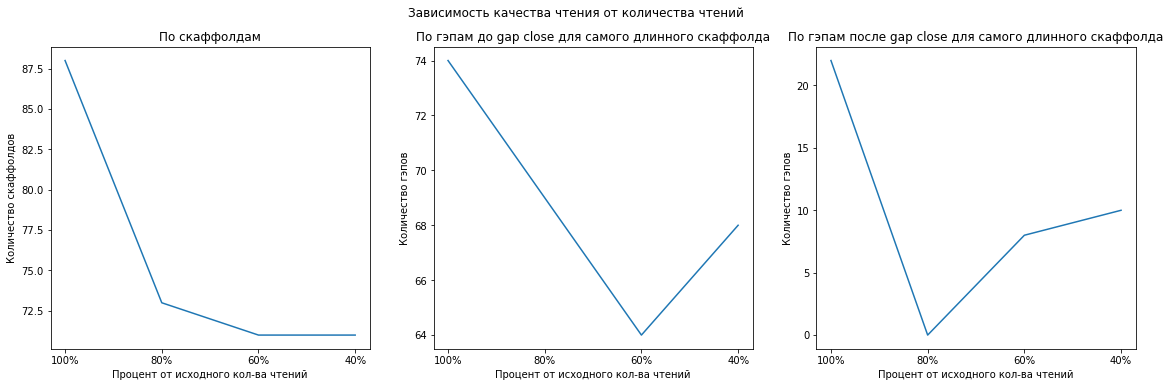

In [74]:
import re
import matplotlib.pyplot as plt

array_contig = []
counter = 0
with open("out_contig.fa") as f:
    for line in f:
        if line[0] == ">":
            array_contig.append(int(line.split("_")[1][3:]))
array_contig.sort(reverse=True)
total_contig_length = sum(array_contig)
total_contig_num = len(array_contig)
max_contig = array_contig[0]
for i in array_contig:
    counter += i
    if counter >= total_contig_length // 2:
        n50 = i
        break
print("Общее количество контигов: {}, их общая длина: {}, длина самого длинного контига: {}, N50: {}".format(total_contig_num, total_contig_length, max_contig, n50))

array_scaffold = []
counter = 0
with open("out_scaffold.fa") as f:
    for line in f:
        if line[0] == ">":
            array_scaffold.append(int(line.split("_")[1][3:]))
array_scaffold.sort(reverse=True)
total_scaffold_length = sum(array_scaffold)
total_scaffold_num = len(array_scaffold)
max_scaffold = array_scaffold[0]
for i in array_scaffold:
    counter += i
    if counter >= total_scaffold_length // 2:
        n50 = i
        break
print("Общее количество скаффолдов: {}, их общая длина: {}, длина самого длинного скаффолда: {}, N50: {}".format(total_scaffold_num, total_scaffold_length, max_scaffold, n50))

with open("longest.fa") as f:
    all = f.read()
    nnn = re.findall('N{1,}', all)
    print("Общее количество гэпов (not gap closed): {}, их общая длина: {}".format(len(nnn), sum([len(i) for i in nnn])))

with open("longest_closed.fa") as f:
    all = f.read()
    nnn = re.findall('N{1,}', all)
    print("Общее количество гэпов (gap closed): {}, их общая длина: {}".format(len(nnn), sum([len(i) for i in nnn])))
    
def get_longest_scaffolds(filename, closed):
    if closed:
        with open(filename) as f:
            all = f.read()
            nnn = re.findall('[ATCGN]{1,}', all)
        max = 0
        for counter, i in enumerate(nnn):
            if len(i) > max:
                max = len(i)
                line_number = counter
        k = 0
        with open(filename) as f:
            for line in f:
                if line[0] == ">":
                    if k == line_number:
                        name = line
                        break
                    k += 1
        print("Самый длинный скаффолд (gap closed): {}".format(name))
        return name
    else:
        max = 0
        with open(filename) as f:
            for line in f:
                if line[0] == ">":
                    num = int(line.split("_")[1][3:])
                    if num > max:
                        max = num
                        name = line
        print("Самый длинный скаффолд (not gap closed): {}".format(name))
        return name
    
def get_scaffolds_and_gaps(file_names_list):
    total_scaffold_num = []
    total_gap_num = []
    total_gap_closed_num = []
    for files in file_names_list:
        
        array_scaffold = []
        counter = 0
        with open(files[0]) as f:
            for line in f:
                if line[0] == ">":
                    array_scaffold.append(int(line.split("_")[1][3:]))
        total_scaffold_num.append(len(array_scaffold))
        
        with open(files[1]) as f:
            all = f.read()
            nnn = re.findall('N{1,}', all)
            total_gap_num.append(len(nnn))
            
        with open(files[2]) as f:
            all = f.read()
            nnn = re.findall('N{1,}', all)
            total_gap_closed_num.append(len(nnn))
            
    px = 1/plt.rcParams['figure.dpi']
    figure, axis = plt.subplots(1, 3, figsize=(1400*px, 400*px))
    
    figure.suptitle("Зависимость качества чтения от количества чтений")
    
    total_scaffold_num.reverse()
    total_gap_num.reverse()
    total_gap_closed_num.reverse()
    x_tick_labels = ["{}%".format(i) for i in range(40, 101, 20)]
    x_tick_labels.reverse()
    axis[0].plot(total_scaffold_num)
    axis[0].set_xticks([i for i in range(4)])
    axis[0].set_xticklabels(x_tick_labels)
    axis[0].title.set_text("По скаффолдам")
    axis[0].set_xlabel("Процент от исходного кол-ва чтений")
    axis[0].set_ylabel("Количество скаффолдов")
    axis[1].plot(total_gap_num)
    axis[1].set_xticks([i for i in range(4)])
    axis[1].set_xticklabels(x_tick_labels)
    axis[1].title.set_text("По гэпам до gap close для самого длинного скаффолда")
    axis[1].set_xlabel("Процент от исходного кол-ва чтений")
    axis[1].set_ylabel("Количество гэпов")
    axis[2].plot(total_gap_closed_num)
    axis[2].set_xticks([i for i in range(4)])
    axis[2].set_xticklabels(x_tick_labels)
    axis[2].title.set_text("По гэпам после gap close для самого длинного скаффолда")
    axis[2].set_xlabel("Процент от исходного кол-ва чтений")
    axis[2].set_ylabel("Количество гэпов")
    plt.savefig("stats.jpg")
    
print("\nПроверяем, правильно ли мы нашли самые большие скаффолды для части 1 домашнего задания:")
    
get_longest_scaffolds("out_scaffold.fa", False)
get_longest_scaffolds("out_gapClosed.fa", True)

print("Ищем самые большие скаффолды для 2 части домашнего задания в каждом из файлов:")

get_longest_scaffolds("out_scaffold80.fa", False)
get_longest_scaffolds("out_scaffold60.fa", False)
get_longest_scaffolds("out_scaffold40.fa", False)

get_longest_scaffolds("out_gapClosed80.fa", True)
get_longest_scaffolds("out_gapClosed60.fa", True)
get_longest_scaffolds("out_gapClosed40.fa", True)
    
files = [["out_scaffold.fa", "longest.fa", "longest_closed.fa"], ["out_scaffold80.fa", "longest80.fa", "longest_closed80.fa"], ["out_scaffold60.fa", "longest60.fa", "longest_closed60.fa"], ["out_scaffold40.fa", "longest40.fa", "longest_closed40.fa"]]

get_scaffolds_and_gaps(files)